## A/B Testing

A/B Testing helps company in identifying if change in strategy lead to significant changes in the results. 

Source : DataCamp 

153 House Democrats and 136 Republicans voted yea on "Civil Rights Act of 1964". However, 91 Democrats and 35 Republicans voted nay. Did party affiliation make a difference in the vote?

To answer this question, I will evaluate the hypothesis that the party of a House member has no bearing on his or her vote. You will use the fraction of Democrats voting in favor as your test statistic and evaluate the probability of observing a fraction of Democrats voting in favor at least as small as the observed fraction of 153/244. (That's right, at least as small as. In 1964, it was the Democrats who were less progressive on civil rights issues.) To do this, permute the party labels of the House voters and then arbitrarily divide them into "Democrats" and "Republicans" and compute the fraction of Democrats voting yea.

Construct Boolean arrays, dems and reps that contain the votes of the respective parties; e.g., dems has 153 True entries and 91 False entries.

In [62]:
import numpy as np
import matplotlib.pyplot as plt
dems=np.array([True]*153+[False]*91)
reps=np.array([True]*136+[False]*35)

print(dems)
print(reps)

# True Means 1 for Yes vote
# False Means 0 for No vote

[ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True False False False
 False False False False False False False False Fa

In [63]:
def draw_perm_reps(data_1, data_2, func, size=1):
    """Generate multiple permutation replicates."""

    # Initialize array of replicates: perm_replicates
    perm_replicates = np.empty(size)

    for i in range(size):
        # Generate permutation sample
        perm_sample_1, perm_sample_2 = permutation_sample(data_1,data_2)

        # Compute the test statistic
        perm_replicates[i] = func(perm_sample_1,perm_sample_2)

    return perm_replicates

def permutation_sample(data1, data2):
    """Generate a permutation sample from two data sets."""

    # Concatenate the data sets: data
    data = np.concatenate((data1,data2))

    # Permute the concatenated array: permuted_data
    permuted_data = np.random.permutation(data)

    # Split the permuted array into two: perm_sample_1, perm_sample_2
    perm_sample_1 = permuted_data[:len(data1)]
    perm_sample_2 = permuted_data[len(data1):]

    return perm_sample_1, perm_sample_2

def frac_yea_dems(dems,rep):
    frac=np.sum(dems)/len(dems)
    return frac
    
def diff_of_means(data_1, data_2):
    """Difference in means of two arrays."""

    # The difference of means of data_1, data_2: diff
    diff = np.mean(data_1)-np.mean(data_2)

    return diff    

def bootstrap_replicate_1d(data, func):
    return func(np.random.choice(data, size=len(data)))

def draw_bs_reps(data, func, size=1):
    """Draw bootstrap replicates."""

    # Initialize array of replicates: bs_replicates
    bs_replicates = np.empty(size)

    # Generate replicates
    for i in range(size):
        bs_replicates[i] = bootstrap_replicate_1d(data,func)

    return bs_replicates

    
perm_replicates=draw_perm_reps(dems,reps,frac_yea_dems,10000)

p=np.sum(perm_replicates<=153/244)/len(perm_replicates)
print("P Value="+ str(p))

print(" This small p-value suggests that party identity had a lot to do with the voting. Importantly, the South had a higher fraction of Democrat representatives, and consequently also a more racist bias.")

P Value=0.0001
 This small p-value suggests that party identity had a lot to do with the voting. Importantly, the South had a higher fraction of Democrat representatives, and consequently also a more racist bias.


## Change in user interaction after website design change

Lets say we have a user data in seconds of how many times a user click on addvertisements over 1 month for before and agfter change

In [64]:
Website_clicks_before=np.array([  -1,  894,   10,  130,    1,  934,   29,    6,  485,  254,  372,
         81,  191,  355,  180,  286,   47,  269,  361,  173,  246,  492,
        462, 1319,   58,  297,   31, 2970,  640,  237,  434,  570,   77,
        271,  563, 3365,   89,    0,  379,  221,  479,  367,  628,  843,
       1613, 1101,  215,  684,  814,  278,  324,  161,  219,  545,  715,
        966,  624,   29,  450,  107,   20,   91, 1325,  124, 1468,  104,
       1309,  429,   62, 1878, 1104,  123,  251,   93,  188,  983,  166,
         96,  702,   23,  524,   26,  299,   59,   39,   12,    2,  308,
       1114,  813,  887])
Website_clicks_after=np.array([ 645, 2088,   42, 2090,   11,  886, 1665, 1084, 2900, 2432,  750,
       4021, 1070, 1765, 1322,   26,  548, 1525,   77, 2181, 2752,  127,
       2147,  211,   41, 1575,  151,  479,  697,  557, 2267,  542,  392,
         73,  603,  233,  255,  528,  397, 1529, 1023, 1194,  462,  583,
         37,  943,  996,  480, 1497,  717,  224,  219, 1531,  498,   44,
        288,  267,  600,   52,  269, 1086,  386,  176, 2199,  216,   54,
        675, 1243,  463,  650,  171,  327,  110,  774,  509,    8,  197,
        136,   12, 1124,   64,  380,  811,  232,  192,  731,  715,  226,
        605,  539, 1491,  323,  240,  179,  702,  156,   82, 1397,  354,
        778,  603, 1001,  385,  986,  203,  149,  576,  445,  180, 1403,
        252,  675, 1351, 2983, 1568,   45,  899, 3260, 1025,   31,  100,
       2055, 4043,   79,  238, 3931, 2351,  595,  110,  215,    0,  563,
        206,  660,  242,  577,  179,  157,  192,  192, 1848,  792, 1693,
         55,  388,  225, 1134, 1172, 1555,   31, 1582, 1044,  378, 1687,
       2915,  280,  765, 2819,  511, 1521,  745, 2491,  580, 2072, 6450,
        578,  745, 1075, 1103, 1549, 1520,  138, 1202,  296,  277,  351,
        391,  950,  459,   62, 1056, 1128,  139,  420,   87,   71,  814,
        603, 1349,  162, 1027,  783,  326,  101,  876,  381,  905,  156,
        419,  239,  119,  129,  467])

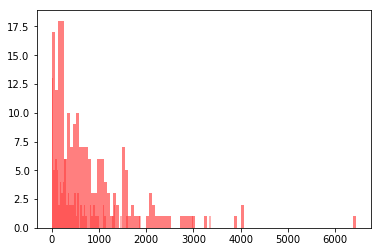

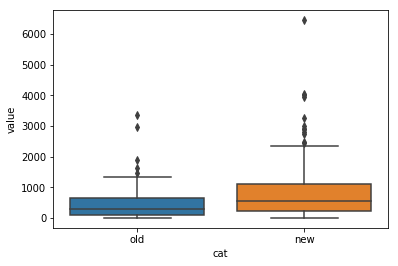

In [65]:
plt.hist(Website_clicks_before,color='r',alpha=0.3,bins=100)
plt.hist(Website_clicks_after,color='r',alpha=0.5,bins=100)
plt.show()

import seaborn as sns
import pandas as pd

df1 = pd.DataFrame(Website_clicks_before, columns=['value'])
df1['cat']='old'
df2 = pd.DataFrame(Website_clicks_after, columns=['value'])
df2['cat']='new'
sns.boxplot(x='cat',y='value',data=pd.concat([df1,df2]))
plt.show()

In [66]:
meandiff=diff_of_means(Website_clicks_before,Website_clicks_after)
perm_replicates=draw_perm_reps(Website_clicks_before,Website_clicks_after,diff_of_means,10000)

p=np.sum(perm_replicates<=meandiff)/len(perm_replicates)
print("P Value="+str(p))
print("The result is extremenly significant, it shows that out of 10000 replicate cases only (0,0.0001 for 1, 0.0002 for 2,3,4,5) case was present which had more mean difference than our actual mean difference. This shows that the strategy was successull and new design of website results are just not a coincidence but a significant result")

P Value=0.0001
The result is extremenly significant, it shows that out of 10000 replicate cases only (0,0.0001 for 1, 0.0002 for 2,3,4,5) case was present which had more mean difference than our actual mean difference. This shows that the strategy was successull and new design of website results are just not a coincidence but a significant result


## Darwin Evolution Theory

In [67]:
finch_1975=pd.read_csv("DarwinData/finch_beaks_1975.csv")
finch_2012=pd.read_csv("DarwinData/finch_beaks_2012.csv")

In [68]:
finch_1975['year']=1975
finch_1975 = finch_1975.rename({'Beak length, mm': 'blength', 'Beak depth, mm': 'bdepth'}, axis=1) 
finch_2012['year']=2012
combined_data=pd.concat([finch_1975,finch_2012],axis=0)
print(combined_data.head(5))

   band species  blength  bdepth  year
0     2  fortis      9.4     8.0  1975
1     9  fortis      9.2     8.3  1975
2    12  fortis      9.5     7.5  1975
3    15  fortis      9.5     8.0  1975
4   305  fortis     11.5     9.9  1975


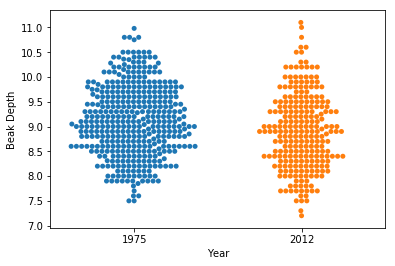

It looks like the birds in 2012 have higher beak depth variance


In [69]:
_=sns.swarmplot(x='year',y='bdepth',data=combined_data)
plt.xlabel('Year')
plt.ylabel('Beak Depth')
plt.show()

print("It looks like the birds in 2012 have higher beak depth variance")

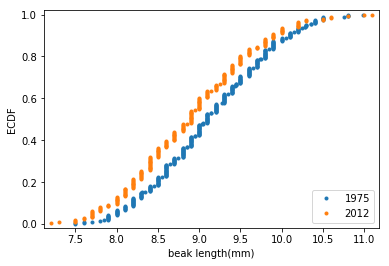

The differnce is quite visible from the ECDF. The 2012 Beaks does have a higher mean and larger variance


In [70]:
def ecdf(data):
    n=len(data)
    x=np.sort(data)
    y=np.arange(1,(n+1))/n
    return x,y

finc_beaks_1975=np.array(finch_1975['bdepth'])
finc_beaks_2012=np.array(finch_2012['bdepth'])

x_1975,y_1975=ecdf(finc_beaks_1975)
x_2012,y_2012=ecdf(finc_beaks_2012)

_=plt.plot(x_1975,y_1975,marker='.',linestyle='none')
_=plt.plot(x_2012,y_2012,marker='.',linestyle='none')

plt.margins(0.02)

_=plt.xlabel('beak length(mm)')
_=plt.ylabel('ECDF')
plt.legend(('1975','2012'),loc='lower right')
plt.show()

print("The differnce is quite visible from the ECDF. The 2012 Beaks does have a higher mean and larger variance")

In [71]:
# Compute the difference of the sample means: mean_diff
mean_diff = np.mean(finc_beaks_2012)-np.mean(finc_beaks_1975)

# Get bootstrap replicates of means
bs_replicates_1975 = draw_bs_reps(finc_beaks_1975,np.mean,10000)
bs_replicates_2012 = draw_bs_reps(finc_beaks_2012,np.mean,10000)

# Compute samples of difference of means: bs_diff_replicates
bs_diff_replicates = bs_replicates_2012-bs_replicates_1975

# Compute 95% confidence interval: conf_int
conf_int = np.percentile(bs_diff_replicates,(2.5,97.5))

# Print the results
print('difference of means =', mean_diff, 'mm')
print('95% confidence interval =', conf_int, 'mm')

difference of means = -0.22313275434243174 mm
95% confidence interval = [-0.33873643 -0.10678396] mm


In [72]:
print(np.mean(finc_beaks_2012))
print(np.mean(finc_beaks_1975))
print("This doesn't looks like, the Hypothesis is that the beaks in 2012 are depper than beaks in 1975. We can see that from the plot above that beaks in 2012 have much more variance and it looks that mid point for dataset is higher for 1975 than 2012. The number of data points for both are unequal")

print("Number of data points in 2012 :"+str(len(finc_beaks_2012)))
print("Data points in 1975 "+str(len(finc_beaks_1975)))


8.90282258064516
9.125955334987593
This doesn't looks like, the Hypothesis is that the beaks in 2012 are depper than beaks in 1975. We can see that from the plot above that beaks in 2012 have much more variance and it looks that mid point for dataset is higher for 1975 than 2012. The number of data points for both are unequal
Number of data points in 2012 :248
Data points in 1975 403


The idea was not to test if the beaks were taken from same distribution but what was to see if they have similar means. To test that we we need to shift the means of the two datset and then use bootstrapping sampling to comute the difference of means

In [73]:
combined_mean=np.mean(np.concatenate((finc_beaks_2012,finc_beaks_1975)))

bd_1975_shifted = finc_beaks_1975-np.mean(finc_beaks_1975)+combined_mean
bd_2012_shifted = finc_beaks_2012-np.mean(finc_beaks_2012)+combined_mean

# Get bootstrap replicates of shifted data sets
bs_replicates_1975 = draw_bs_reps(bd_1975_shifted,np.mean,10000)
bs_replicates_2012 = draw_bs_reps(bd_2012_shifted,np.mean,10000)


bs_diff_replicates = bs_replicates_2012-bs_replicates_1975

# Compute the p-value
p = np.sum(bs_diff_replicates <= mean_diff) / len(bs_diff_replicates)

# Print p-value
print("The P value is : ")
print('p =', p)


The P value is : 
p = 0.0001


### EDA of Beak Length and Width

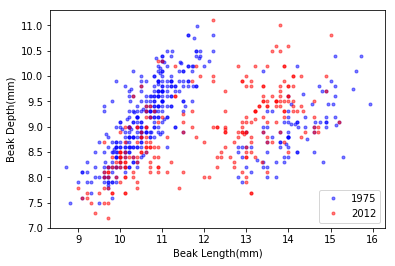

In [74]:
bl_1975=finch_1975['blength']
bd_1975=finch_1975['bdepth']

bl_2012=finch_2012['blength']
bd_2012=finch_2012['bdepth']

_=plt.plot(bl_1975,bd_1975,marker='.',linestyle='none',alpha=0.5,color='blue')
_=plt.plot(bl_2012,bd_2012,marker='.',linestyle='none',alpha=0.5,color='red')
_=plt.xlabel('Beak Length(mm)')
_=plt.ylabel('Beak Depth(mm)')
_=plt.legend(('1975','2012'),loc='lower right')
plt.show()

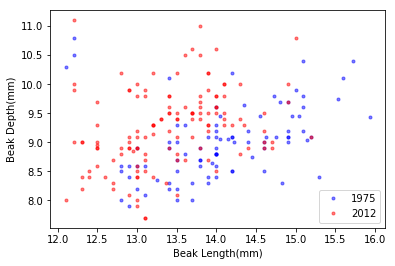

In [75]:
# Lets slice the data, to only have beaks which are of greater length than >11 mm in both 1975 and 2012
finch_1975=finch_1975[(finch_1975['blength']>12)]
finch_2012=finch_2012[finch_2012['blength']>12]


bl_1975=finch_1975['blength']
bd_1975=finch_1975['bdepth']

bl_2012=finch_2012['blength']
bd_2012=finch_2012['bdepth']

_=plt.plot(bl_1975,bd_1975,marker='.',linestyle='none',alpha=0.5,color='blue')
_=plt.plot(bl_2012,bd_2012,marker='.',linestyle='none',alpha=0.5,color='red')
_=plt.xlabel('Beak Length(mm)')
_=plt.ylabel('Beak Depth(mm)')
_=plt.legend(('1975','2012'),loc='lower right')
plt.show()

 Linear regression to find slopes for both the data sets

In [78]:
def draw_bs_pairs_linreg(x, y, size=1):
    """Perform pairs bootstrap for linear regression."""

    # Set up array of indices to sample from: inds
    inds = np.arange(len(x))

    # Initialize replicates: bs_slope_reps, bs_intercept_reps
    bs_slope_reps = np.empty(size)
    bs_intercept_reps = np.empty(size)

    # Generate replicates
    for i in range(size):
        bs_inds = np.random.choice(inds, size=len(inds))
        bs_x, bs_y = x[bs_inds], y[bs_inds]
        bs_slope_reps[i], bs_intercept_reps[i] = np.polyfit(bs_x,bs_y,1)

    return bs_slope_reps, bs_intercept_reps


# Compute the linear regressions
slope_1975, intercept_1975 = np.polyfit(bl_1975,bd_1975,1)
slope_2012, intercept_2012 = np.polyfit(bl_2012,bd_2012,1)

# Perform pairs bootstrap for the linear regressions
bs_slope_reps_1975, bs_intercept_reps_1975 = draw_bs_pairs_linreg(np.array(bl_1975),np.array(bd_1975),size=1000)
bs_slope_reps_2012, bs_intercept_reps_2012 = draw_bs_pairs_linreg(np.array(bl_2012),np.array(bd_2012),size=1000)

# Compute confidence intervals of slopes
slope_conf_int_1975 = np.percentile(bs_slope_reps_1975,(2.5,97.5))
slope_conf_int_2012 = np.percentile(bs_slope_reps_2012,(2.5,97.5))
intercept_conf_int_1975 = np.percentile(bs_intercept_reps_1975,(2.5,97.5))
intercept_conf_int_2012 = np.percentile(bs_intercept_reps_2012,(2.5,97.5))


# Print the results
print('1975: slope =', slope_1975,
      'conf int =', slope_conf_int_1975)
print('1975: intercept =', intercept_1975,
      'conf int =', intercept_conf_int_1975)
print('2012: slope =', slope_2012,
      'conf int =', slope_conf_int_2012)
print('2012: intercept =', intercept_2012,
      'conf int =', intercept_conf_int_2012)

print("The intercept looks different but the slopes look out similar")

1975: slope = 0.2313593586401523 conf int = [-0.00462008  0.46812142]
1975: intercept = 5.760508712589275 conf int = [2.33461426 9.07310022]
2012: slope = 0.3182753691105737 conf int = [0.14921031 0.48821112]
2012: intercept = 4.978033699130928 conf int = [2.6773473  7.25334494]
The intercept looks different but the slopes look out similar


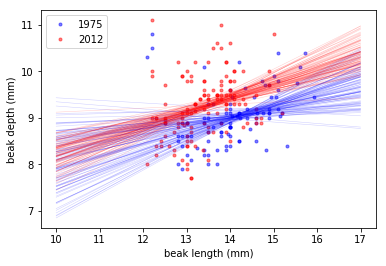

In [80]:
# Make scatter plot of 1975 data
_ = plt.plot(bl_1975, bd_1975, marker='.',
             linestyle='none', color='blue', alpha=0.5)

# Make scatter plot of 2012 data
_ = plt.plot(bl_2012, bd_2012, marker='.',
             linestyle='none', color='red', alpha=0.5)

# Label axes and make legend
_ = plt.xlabel('beak length (mm)')
_ = plt.ylabel('beak depth (mm)')
_ = plt.legend(('1975', '2012'), loc='upper left')

# Generate x-values for bootstrap lines: x
x = np.array([10,17])

# Plot the bootstrap lines
for i in range(100):
    plt.plot(x,bs_slope_reps_1975[i]*x+bs_intercept_reps_1975[i],linewidth=0.5, alpha=0.2, color='blue')
    plt.plot(x,bs_slope_reps_2012[i]*x+bs_intercept_reps_2012[i],linewidth=0.5, alpha=0.2, color='red')

# Draw the plot again
plt.show()

### Beak Length to Depth Ratio - To analyse the change in shape of the beaks 

In [96]:
ratio_1975=np.array(bl_1975)/np.array(bd_1975)
ratio_2012=np.array(bl_2012)/np.array(bd_2012)

mean_ratio_1975=np.mean(ratio_1975)
mean_ratio_2012=np.mean(ratio_2012)

bs_replicates_1975=draw_bs_reps(ratio_1975,np.mean,10000)
bs_replicates_2012=draw_bs_reps(ratio_2012,np.mean,10000)

# Confidence Intervalbs_replicates_2012
conf_int_1975=np.percentile(bs_replicates_1975,(0.05,99.5))
conf_int_2012=np.percentile(bs_replicates_2012,(0.05,99.5))

# Print the results
print('1975: mean ratio =', mean_ratio_1975,
      'conf int =', conf_int_1975)
print('2012: mean ratio =', mean_ratio_2012,
      'conf int =', conf_int_2012)


print("Looks like the beak overall size has descreasd or it is highlyl possible that it is highly due to noise, let me compute the p-value to decide on it")

1975: mean ratio = 1.5647673165361893 conf int = [1.52470152 1.59336515]
2012: mean ratio = 1.456409131656136 conf int = [1.42787648 1.48000876]
Looks like the beak overall size has descreasd or it is highlyl possible that it is highly due to noise, let me compute the p-value to decide on it


### Anlaysing hereditary line of the bird and relation betwee parent and offspring birds

In [104]:
fortis_heredit=pd.read_csv("DarwinData/fortis_beak_depth_heredity.csv")
scandens_heredit=pd.read_csv("DarwinData/scandens_beak_depth_heredity.csv")

print(fortis_heredit.head(5))

print(scandens_heredit.head(5))

   Mid-offspr  Male BD  Female BD
0       10.70    10.90        9.3
1        9.78    10.70        8.4
2        9.48    10.70        8.1
3        9.60    10.70        9.8
4       10.27     9.85       10.4
   mid_parent  mid_offspring
0      8.3318         8.4190
1      8.4035         9.2468
2      8.5317         8.1532
3      8.7202         8.0089
4      8.7089         8.2215


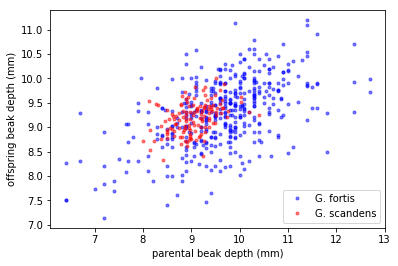

In [107]:
# Make scatter plots
_ = plt.plot(fortis_heredit['Male BD'],fortis_heredit['Mid-offspr'],
             marker='.', linestyle='none', color='blue', alpha=0.5)
_ = plt.plot(scandens_heredit['mid_offspring'],scandens_heredit['mid_parent'],
             marker='.', linestyle='none', color='red', alpha=0.5)

# Label axes
_ = plt.xlabel('parental beak depth (mm)')
_ = plt.ylabel('offspring beak depth (mm)')

# Add legend
_ = plt.legend(('G. fortis', 'G. scandens'), loc='lower right')

# Show plot
plt.show()


In [118]:
from scipy.stats.stats import pearsonr

def draw_bs_pairs(x, y, func, size=1):
    """Perform pairs bootstrap for a single statistic."""

    # Set up array of indices to sample from: inds
    inds = np.array(np.arange(len(x)))

    # Initialize replicates: bs_replicates
    bs_replicates = np.empty(size)

    # Generate replicates
    for i in range(size):
        bas_inds = np.random.choice(inds,size=len(inds))
        bs_x, bs_y = x[bas_inds],y[bas_inds]
        bs_replicates[i] = func(bs_x,bs_y)[0]

    return bs_replicates


# Compute the Pearson correlation coefficients
r_scandens = pearsonr(fortis_heredit['Male BD'],fortis_heredit['Mid-offspr'])[0]
r_fortis = pearsonr(scandens_heredit['mid_offspring'],scandens_heredit['mid_parent'])[0]

# Acquire 1000 bootstrap replicates of Pearson r
bs_replicates_scandens = draw_bs_pairs(np.array(fortis_heredit['Male BD']),
np.array(fortis_heredit['Mid-offspr']),pearsonr,1000)

bs_replicates_fortis = draw_bs_pairs(
np.array(scandens_heredit['mid_offspring']),
np.array(scandens_heredit['mid_parent']),pearsonr,1000)


# Compute 95% confidence intervals
conf_int_scandens = np.percentile(bs_replicates_scandens,(2.5,97.5))
conf_int_fortis = np.percentile(bs_replicates_fortis,(2.5,97.5))

# Print results
print('G. scandens:', r_scandens, conf_int_scandens)
print('G. fortis:', r_fortis, conf_int_fortis)



G. scandens: 0.5216890217970432 [0.43520775 0.59652938]
G. fortis: 0.41170636294012586 [0.28016772 0.54087009]
